In [2]:
using Plots, LaTeXStrings, LinearAlgebra
include("../lib/simplepolynomials.jl")

newton_polynomial (generic function with 1 method)

# 일변수 방정식의 해

## 이분법

In [3]:
t = 1:0.1:9

ff = newton_polynomial([1, 4, 8, 9], [-4, 1, 4.2, 4.5 ])
# plot(t, ff.(t), frame = :none, label=:none, dpi=300)

SimplePolynomial(0.0029761904761905324 x^3 - 0.1625000000000008 x^2 + 2.4166666666666696 x^1 - 6.257142857142859)


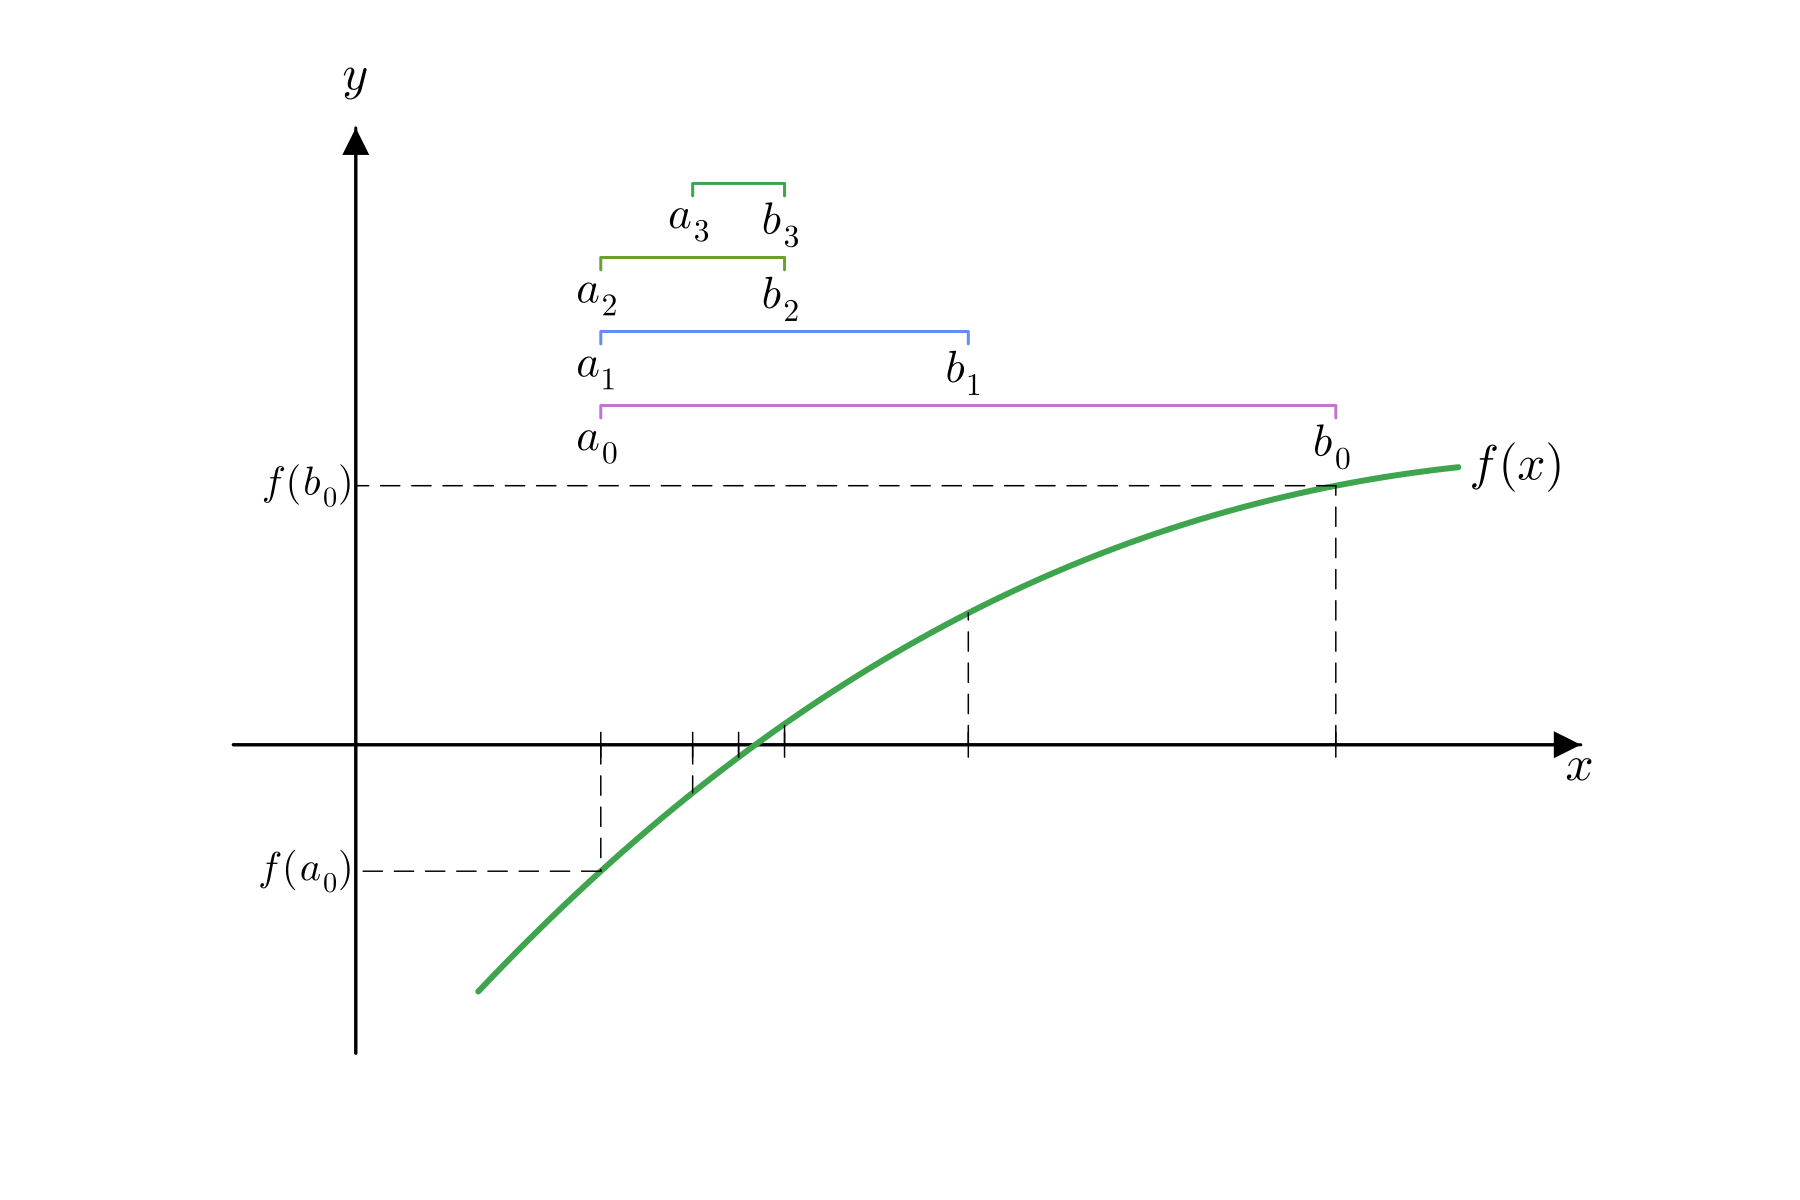

In [4]:

p1=plot([-1, 10], [0.0, 0.0], arrow=(:closed, 2), lw=1, lc=:black,  
    frame = :none, label=:none, dpi=300, xlim = (-2, 11.5), ylim = (-6, 11.5))

plot!([0, 0], [-5, 10], arrow=(:closed, 2), lw=1, lc=:black, label=:none)

plot!(t, ff.(t), frame = :none, label=:none, lw=2)

annotate!(t[end]+0.5, ff(t[end]), text(L"f(x)", :black, 11, :center))

annotate!(10.0, -0.4, text(L"x", :black, 11, :center))
annotate!(0, 10.2, text(L"y", :black, 11, :bottom))


a, b = [2, 8]
for i in 1:4
    yy = 4.3 + 1.2*i
   
    plot!([a, a, b, b], [yy-0.2, yy, yy, yy-0.2], label = :none)
    annotate!(a, yy-0.2, text(latexstring("a_{$(i-1)}"), :black, 10, :top))
    annotate!(b, yy-0.2, text(latexstring("b_{$(i-1)}"), :black, 10, :top))

    if i == 1
        plot!([a, a], [-0.2, 0.2], lw=0.5, lc=:black, label =:none)
        plot!( [a, a], [0, ff(a)], lw=0.5, ls=:dash, lc=:black, label=:none)
        
        plot!([b, b], [-0.2, 0.2], lw=0.5, lc=:black, label = :none)
        plot!( [b, b], [0, ff(b)], lw=0.5, ls=:dash, lc=:black, label=:none)
        
        plot!([a, 0], [ff(a), ff(a)], lw=0.5, lc=:black, ls=:dash, label = :none)
        annotate!(0, ff(a), text(latexstring("f(a_0)"), :black, 9, :right))
        plot!([b, 0], [ff(b), ff(b)], lw=0.5, lc=:black, ls=:dash, label = :none)
        annotate!(0, ff(b), text(latexstring("f(b_0)"), :black, 9, :right))
    end
  

    c=(a+b)/2
    if ff(a) * ff(c) < 0
        a, b = a, c
    else 
        a, b, = c, b
    end

    plot!([c, c], [-0.2, 0.2], lw=0.5, lc=:black, label = :none)
    plot!( [c, c], [0, ff(c)], lw=0.5, ls=:dash, lc=:black, label=:none)

end
plot(p1)
#savefig("bisection_concept.png")

In [5]:
function bisection(f::Function, a, b, xtol=1e-10, maxiter::Integer=10_000)
    Nitter = 0
    a, b = minmax(a, b)
    
    f(a)*f(b) <= 0 || error("f(a)*f(b) should be negative") 
    c=0
    while ((b-a) > xtol) 
        Nitter +=1
        Nitter < maxiter || error("Interation 횟수가 정해진 최댓값에 도달했습니다")
        c = (a+b)/2
        if f(c) == 0.0
            break
        elseif f(a)*f(c) < 0 
            a, b = a, c
        else 
            a, b = c, b 
        end
    end
    println("Number of Iterlation = $Nitter")
    return c    
end


bisection (generic function with 3 methods)

In [6]:
sqrt2 = bisection(x -> x^2-2, 0.0, 4.0)
realsqrt2 = sqrt(2.0)
difference = realsqrt2-sqrt2
println("실제값 = $realsqrt2, 계산값 = $sqrt2, 차이 = $difference")

Number of Iterlation = 36
실제값 = 1.4142135623730951, 계산값 = 1.4142135623260401, 차이 = 4.705502654189786e-11


## 고정점

In [8]:
function fixedpoint(f::Function, xi, xtol=1.0e-10, MaxIter = 100_000)
    Niter = 0
    for i in 1:MaxIter
        c = f(xi)
        if abs(c-xi) < xtol
            return c
        else
            xi = c
            Niter += 1
        end
    end
    error("최대 반복 횟수 $MaxIter 에 도달하였으나 답을 찾지 못함.")
end

fixedpoint (generic function with 3 methods)

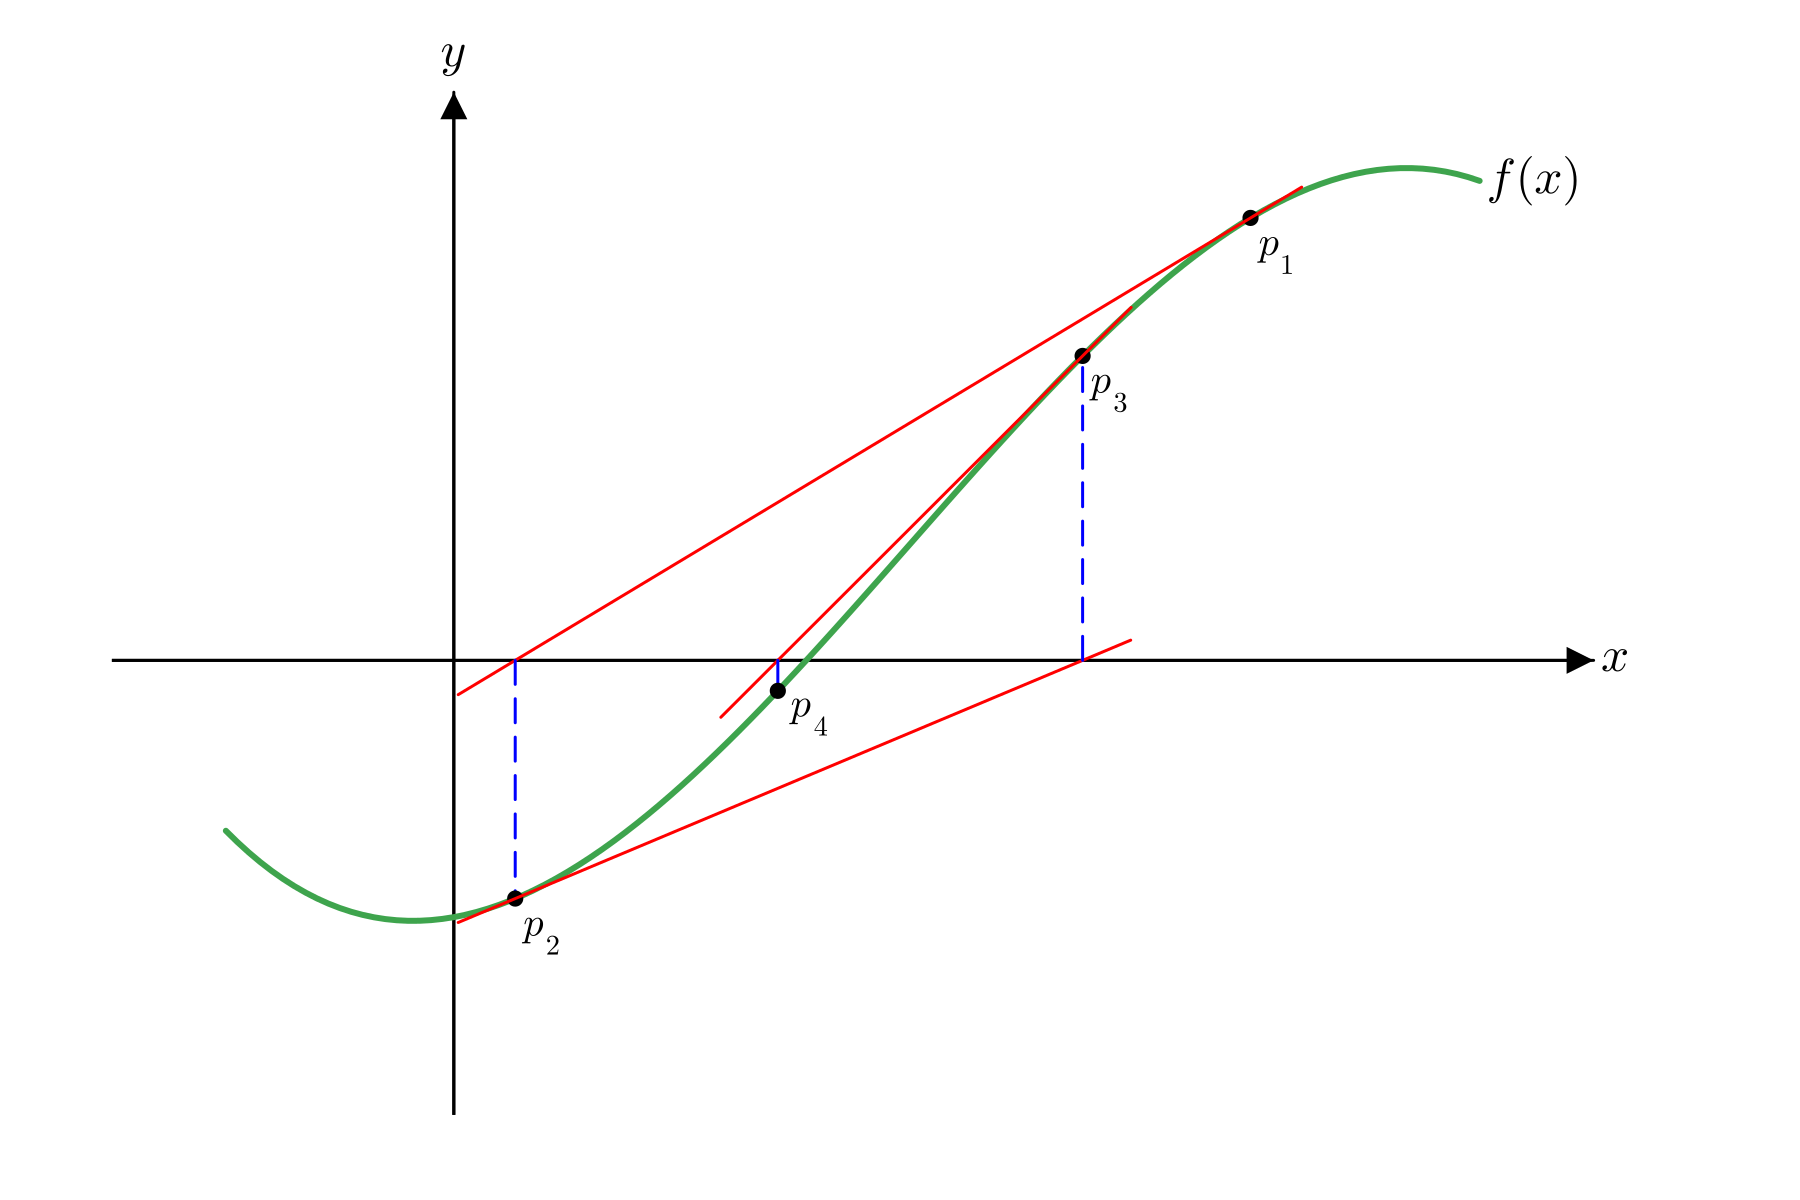

In [29]:
ff = -(polynomial_from_roots([-3, 3, 12])+5)*0.02
t = -2:0.1:9
# plot(t, f2.(t))
plot1 = plot([-3, 10], [0.0, 0.0], arrow=(:closed, 2), lw=1, lc=:black,  
    frame = :none, label=:none, dpi=300, xlim = (-3, 11.5), ylim = (-4, 5.5))

plot!([0, 0], [-4, 5], arrow=(:closed, 2), lw=1, lc=:black, label=:none)

plot!(t, ff.(t), frame = :none, label=:none, lw=2)

annotate!(t[end]+0.5, ff(t[end]), text(L"f(x)", :black, 11, :center))

annotate!(10.2, 0, text(L"x", :black, 11, :center))
annotate!(0, 5.0, text(L"y", :black, 11, :bottom))

p1, p2 = 6.99, 0.0
iM=4
for i in 1:3
    
    scatter!([p1, ], [ff(p1)], mc=:black, label = :none, ms =3)
    annotate!(p1+0.25, ff(p1)-0.1, text(latexstring(L"p_{%$i}"), :black, 9, :top))
    df(x) = (derivative(ff)(p1))*(x-p1) + ff(p1)
    

    p2 = -ff(p1)/(derivative(ff)(p1)) + p1

    pm, pM = minmax(p1, p2)
    t1 = pm-0.5:0.1:pM+0.5
    plot!(t1, df.(t1), lc=:red, label = :none)


    #
    plot!([p2, p2], [0, ff(p2)], label = :none, ls = :dash, lc = :blue)
    p1 = p2
end
scatter!([p2, ], [ff(p2)], mc=:black, label = :none, ms=3)
annotate!(p1+0.1, ff(p1), text(latexstring(L"p_{%$iM}"), :black, 9, :left, :top))
plot(plot1)
#savefig("newton_method.png")

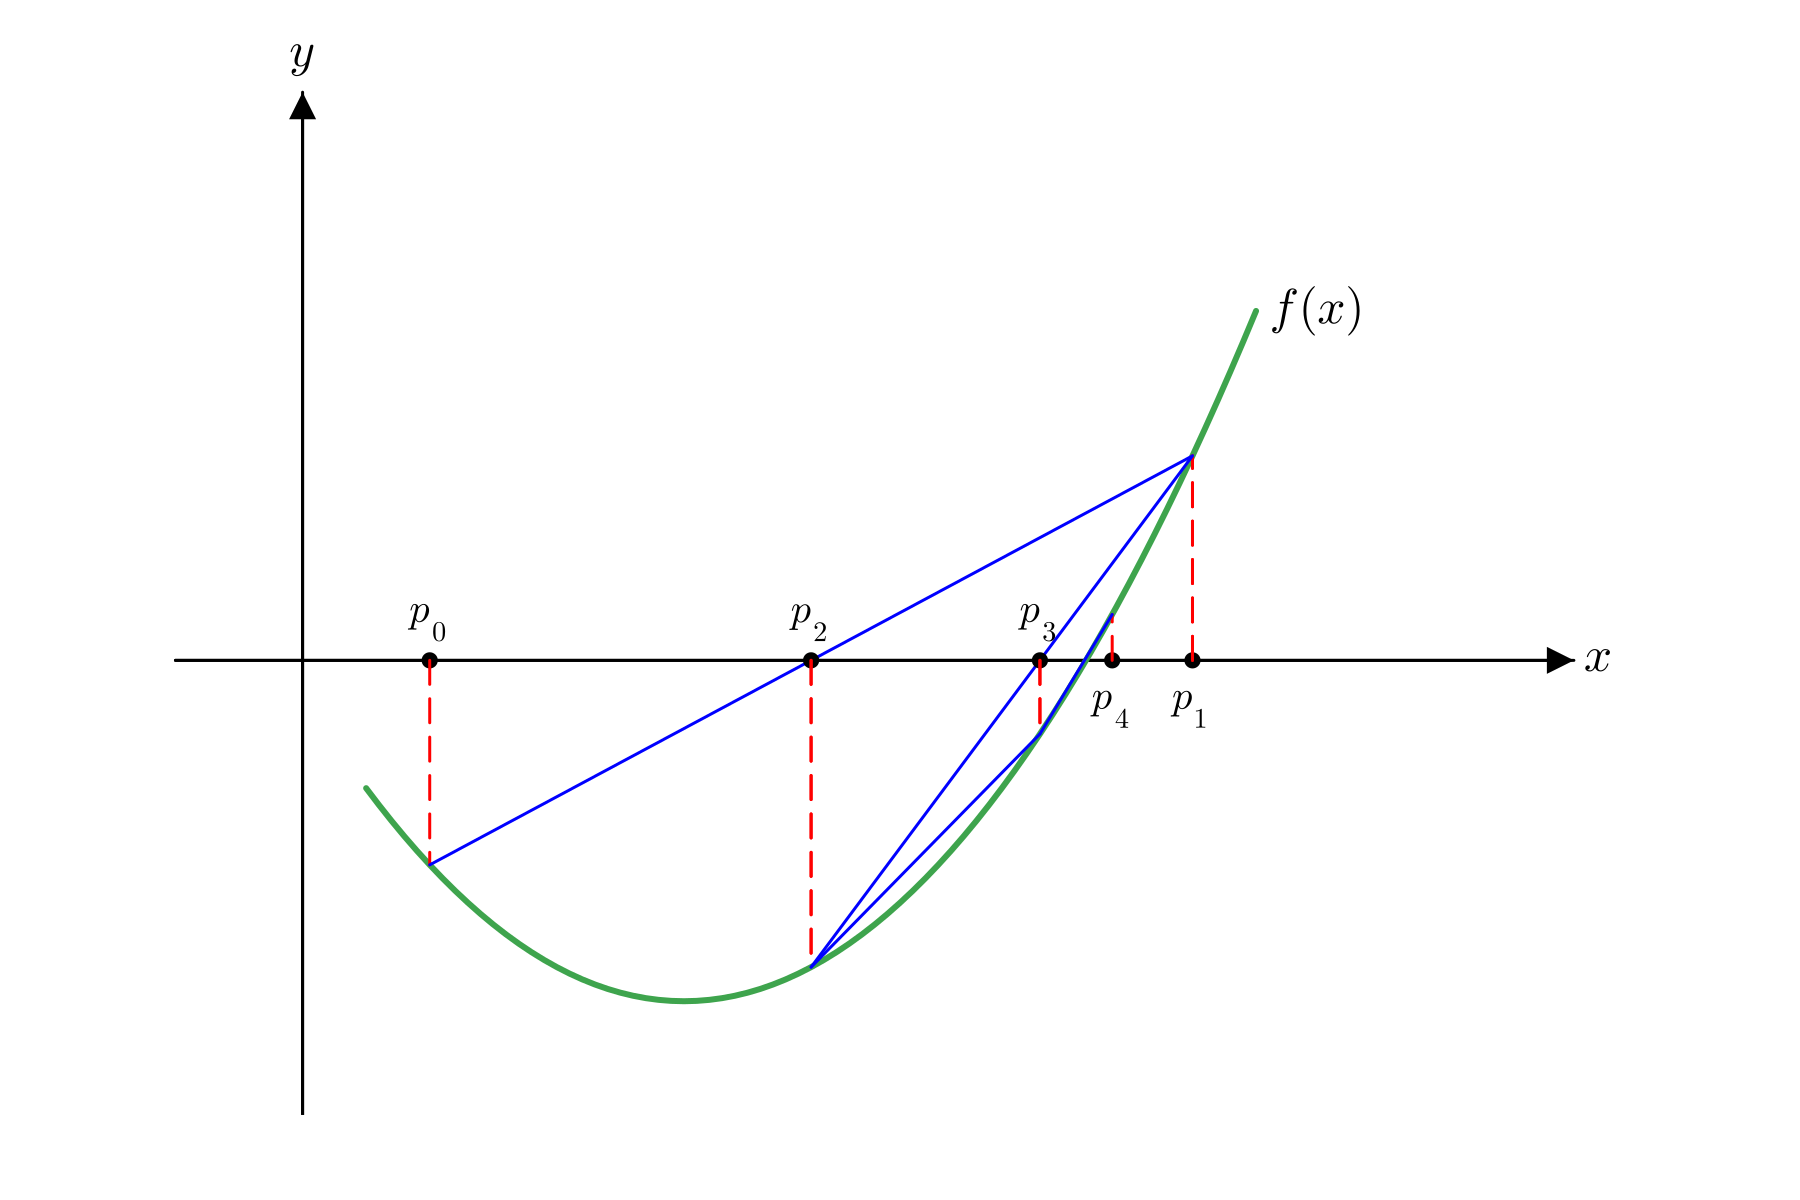

In [85]:
ff = (x->0.3*(x-3)^2-3)
t = 0.5:0.1:7.5
# plot(t, f2.(t))
plot1 = plot([-1, 10], [0.0, 0.0], arrow=(:closed, 2), lw=1, lc=:black,  
    frame = :none, label=:none, dpi=300, xlim = (-1.5, 11.5), ylim = (-4, 5.5))

plot!([0, 0], [-4, 5], arrow=(:closed, 2), lw=1, lc=:black, label=:none)

plot!(t, ff.(t), frame = :none, label=:none, lw=2)

annotate!(t[end]+0.5, ff(t[end]), text(L"f(x)", :black, 11, :center))

annotate!(10.2, 0, text(L"x", :black, 11, :center))
annotate!(0, 5.0, text(L"y", :black, 11, :bottom))

p0, p1= 1, 7
scatter!([p0, ], [0, ], ms=3, mc=:black, label = :none)
annotate!(p0, 0.1, text(L"p_{0}", :black, 9, :bottom))
for i in 1:3
    
    scatter!([p1,], [0, ], ms=3, mc=:black, label = :none)
    if ff(p1)>0
        annotate!(p1, -0.2, text(L"p_{%$(i)}", :black, 9, :top))
    else
        annotate!(p1, 0.1, text(L"p_{%$(i)}", :black, 9, :bottom))
    end
    plot!([p0, p0], [0, ff(p0)], label = :none, ls = :dash, lc=:red)
    plot!([p1, p1], [0, ff(p1)], label = :none, ls = :dash, lc=:red)
    plot!([p0, p1], [ff(p0), ff(p1)], label = :none, lc=:blue)

    p0, p1 = p1, p1-ff(p1)/(ff(p1)-ff(p0))*(p1-p0)
    #println(p1)
end

scatter!([p1,], [0, ], ms=3, mc=:black, label = :none)
if ff(p1)>0
    annotate!(p1, -0.2, text(L"p_{4}", :black, 9, :top))
else
    annotate!(p1, 0.1, text(L"p_{4}", :black, 9, :bottom))
end
plot!([p0, p0], [0, ff(p0)], label = :none, ls = :dash, lc=:red)
plot!([p1, p1], [0, ff(p1)], label = :none, ls = :dash, lc=:red)
plot!([p0, p1], [ff(p0), ff(p1)], label = :none, lc=:blue)

#savefig("secant_method.png")

In [10]:
deferential(ff)

LoadError: UndefVarError: deferential not defined

In [2]:
function fq(n)
    s=1
    for i in 1:n
        s+= s/n
    end
    return s
end

fq (generic function with 1 method)

In [16]:
fq(10_0000_0000)-ℯ

-1.3591230363374507e-9

In [7]:
ff

SimplePolynomial(0.0029761904761905324 x^3 - 0.1625000000000008 x^2 + 2.4166666666666696 x^1 - 6.257142857142859)
